#### 스무딩 기법 이상치 탐지

1. 데이터 잡음이나 불규칙한 변동을 완화시키는 기법
2. 데이터의 추세나 패턴을부드럽게 만들어조는 과정
3. 이동 평균이나 지수 평활법과 같은 방법을 사용하여 데이터 변동 완화

- 데이터의 부드러운 버전을 생성하여 예측 모델의 성능을 향상
- 현재 값에 더 높은 가중치를 주고, 이전 값에는 낮은 가중치를 주는 방식으로 데이터 부드럽게 만듬

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. 데이터 생성

In [3]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range (start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) * 10 # 정규 분포를 따르는 데이터 생성

# 데이터프레임 생성
data = pd.DataFrame({'Date': dates, 'Value': values})

#### 2. 시각화

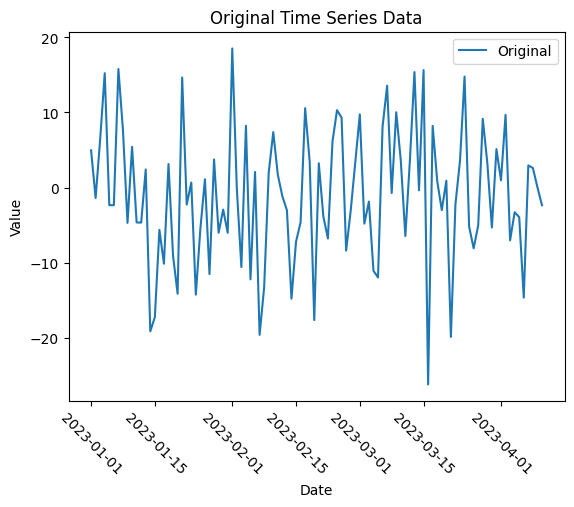

In [5]:
#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=-45)
plt.title('Original Time Series Data')
plt.legend()
plt.show()

#### 3. 이동 평균기법 활용 및 시각화

In [9]:
# 이동 평군을 사용한 스무딩
window_size = 7 # 윈도우 크기 설정

# 이동 평균 계산
data['MovingAverage'] = data['Value'].rolling(window=window_size,min_periods=1).mean()

'''
min_periods=1 은 최소한 하나의 유효한 값이 있는 구간에서도 평균을 계산하도록 설정합니다.
'''

'\nmin_periods=1 은 최소한 하나의 유효한 값이 있는 구간에서도 평균을 계산하도록 설정합니다.\n'

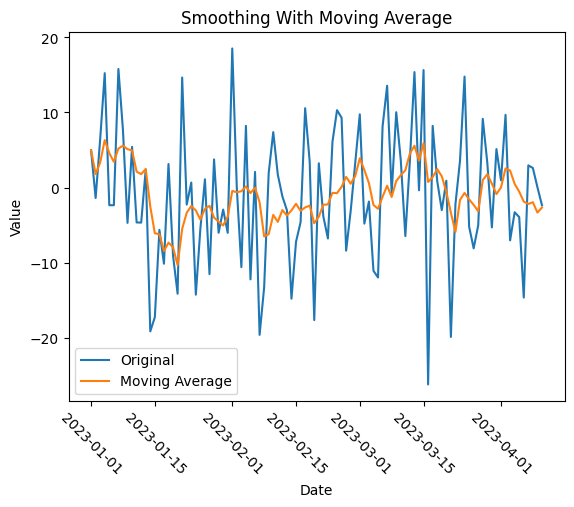

In [8]:
#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'],data['MovingAverage'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=-45)
plt.title('Smoothing With Moving Average')
plt.legend()
plt.show()

#### 4. 지수 평활법 활용 및 시각화

In [12]:
# 지수 평활법을 사용한 스무딩
alpha = 0.3 # 지수 평활법의 평활 계수 설정

# 지수 평활법의 계산
data['ExponentialSmoothing'] = data['Value'].ewm(alpha=alpha).mean()

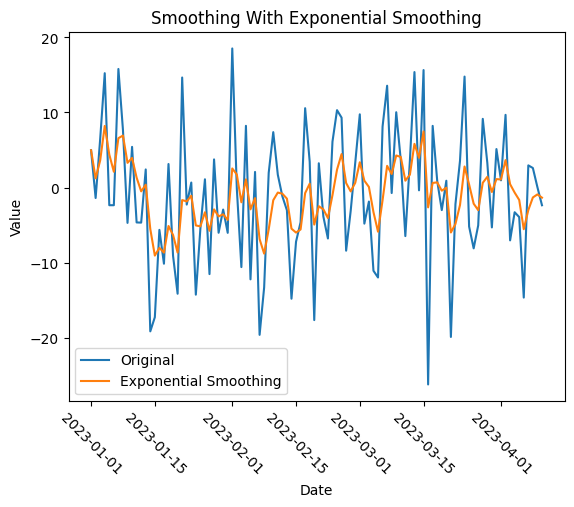

In [16]:
#시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.plot(data['Date'],data['ExponentialSmoothing'], label='Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=-45)
plt.title('Smoothing With Exponential Smoothing')
plt.legend()
plt.show()